In [1]:
import pandas as pd # pandas is a data manipulation library
import numpy as np #provides numerical arrays and functions to manipulate the arrays efficiently
import matplotlib.pyplot as plt # data visualization library
from sklearn import datasets
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.utils.extmath import randomized_svd
import math
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score


## 1

/tmp/ipykernel_13036/610206866.py:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ml-latest-small/METABRIC_RNA_Mutation.csv")  # Adapt the path


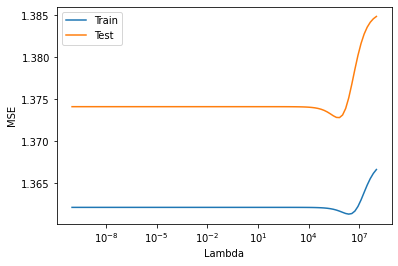

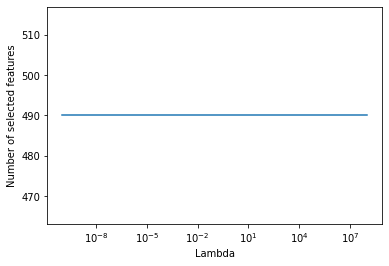

In [2]:
df = pd.read_csv("ml-latest-small/METABRIC_RNA_Mutation.csv")  # Adapt the path
df_D = pd.concat([df['age_at_diagnosis'], df.iloc[:, 31:520]], axis=1)
D = df_D.to_numpy()
y = df['overall_survival_months'].to_numpy()
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv', sep=',')
μ = np.mean(pd.unique(ratings["rating"]))

df_D_NA = ratings.pivot(
    index='userId',
    columns='movieId',
    values='rating'
)

new = df_D_NA.fillna(μ)
array = new.values
Id_NA = new.isna().to_numpy()


ftr = df_D
trgt = pd.DataFrame(y)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(trgt):
    # Split the data into training and testing sets for this fold
    X_train, X_test = trgt.iloc[train_index], trgt.iloc[test_index]
    # Perform any other operations you need to do on the training and testing sets
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(ftr):
    # Split the data into training and testing sets for this fold
    y_train, y_test = ftr.iloc[train_index], ftr.iloc[test_index]
    # Perform any other operations you need to do on the training and testing sets


def fit_ridge_regression(X_train, y_train, alpha):
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    return model


def predict_ridge_regression(model, X):
    return model.predict(X)


def fit_lasso(X_train, y_train, alpha):
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    return model


def predict_lasso(model, X):
    return model.predict(X)


# Fit and predict using Ridge
alphas = np.logspace(-10, 8, num=100)
mse_train = []
mse_test = []
selected_features = []
for alpha in alphas:
    model = fit_ridge_regression(X_train, y_train, alpha)
    mse_train.append(np.mean(-cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')))
    mse_test.append(np.mean(-cross_val_score(model, X_test, y_test, cv=5, scoring='neg_mean_squared_error')))
    selected_features.append(np.sum(np.abs(model.coef_) > 1e-16))

# Plot MSE and number of selected features
plt.plot(alphas, mse_train, label='Train')
plt.plot(alphas, mse_test, label='Test')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.legend()
plt.show()

plt.plot(alphas, selected_features)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Number of selected features')
plt.show()

### A - a

### B - a

## 2

### A

True. Prediction class for student A = 1/(1 + exp(8 - 0.1*45 - 0.5*6.5) = 0.438 
0.438 > 0.4

### B

False. Odds ratio = 0.438/0.562 = 0.779

### C

False. Odds ratio of X2 = exp(0.5) = 1.65. Odds ratio of X1 = exp(0.1) = 1.105
1.65/1.105 = 1.49

### D

False. (P(grade st. B >= 7) >= 0.5) =
 1/(1 + exp(8 - 0.1X1 - 0.5*7)) >= 0.5
correct answer is: X1 >= 45

## 3

A. True

B. False

C. True

D. False

# Movielens Preprocessing
To read the dataset you might need to alter the path to look for it, but if you put the ml-latest-small folder  in the same directory where your notebook lies, this should work: 

In [3]:
# lets explore movies.csv
movies= pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# lets explore ratings.CSV
ratings=pd.read_csv('ml-latest-small/ratings.csv',sep=',')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


The original ratings are in the range of 0.5 and 5:

In [5]:
min(ratings["rating"]), max(ratings["rating"])

(0.5, 5.0)

The mean rating is 2.75.

In [6]:
μ = np.mean(pd.unique(ratings["rating"]))
μ

2.75

We convert the sparse representation of movie ratings as a list of observed entries into a users times movies data matrix. 

In [7]:
df_D_NA = ratings.pivot(
    index='userId',
    columns='movieId',
    values='rating'
)
df_D_NA.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We impute the missing values with the mean rating $\mu$.

In [8]:
df_D = df_D_NA.fillna(μ)  #fill unobserved entries with μ
df_D.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.00,2.75,4.00,2.75,2.75,4.00,2.75,2.75,2.75,2.75,...,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75
2,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,...,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75
3,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,...,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75
4,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,...,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75
5,4.00,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,...,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75


The matrix `Id_NA` indicates the missing values as a Boolean matrix.

In [9]:
Id_NA = df_D_NA.isna().to_numpy()
Id_NA

array([[False,  True, False, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True]])

You can search for the movieIds of titles as follows:

In [10]:
movies.loc[movies['title'].str.contains("Star Wars",na=False)]

,movieId,title,genres
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
898,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
911,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
1979,2628,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi
3832,5378,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX
5896,33493,Star Wars: Episode III - Revenge of the Sith (...,Action|Adventure|Sci-Fi
6823,61160,Star Wars: The Clone Wars (2008),Action|Adventure|Animation|Sci-Fi
7367,79006,Empire of Dreams: The Story of the 'Star Wars'...,Documentary
8683,122886,Star Wars: Episode VII - The Force Awakens (2015),Action|Adventure|Fantasy|Sci-Fi|IMAX
8908,135216,The Star Wars Holiday Special (1978),Adventure|Children|Comedy|Sci-Fi


## Recommendations by SVD

The data matrix is now notably bigger than the toy examples of the lecture. If you use the `np.linalg.svd` function, set the parameter `full_matrices=False` to speed up this function. Alternatively, you can directly compute a truncated SVD with the `sklearn.utils.extmath` function `randomized_svd`.

To get the index of the data matrix, given user and movie Id, you can use the following method. As parameter df you can use for example `df_D`.

In [11]:
def get_index_D(df,userId,movieId):
    return (df.index.get_loc(userId),df.columns.get_loc(movieId))
def get_user_index_D(df,userId):
    return df.index.get_loc(userId)

## 4

In [12]:
#numpy SVD like in lecture
r=5
U, s, V = np.linalg.svd(df_D,full_matrices=True)
Y=U[:,0:r]*np.sqrt(s[0:r])
X=V.T[:,0:r]*np.sqrt(s[0:r])
D_trunc = Y@X.T

In [13]:
D_trunc=pd.DataFrame(D_trunc)
D_trunc = D_trunc.set_index(pd.Index(range(1,611)))
D_trunc = D_trunc.set_axis(df_D_NA.columns, axis='columns')
D_trunc.index.name = 'userId'
D_trunc.columns.name = 'movieId'

### A - True

In [14]:
movies.loc[movies['title'].str.contains('Aliens')]

,movieId,title,genres
902,1200,Aliens (1986),Action|Adventure|Horror|Sci-Fi
5874,33090,Mutant Aliens (2001),Animation|Comedy|Sci-Fi
6178,44777,Evil Aliens (2005),Comedy|Horror|Sci-Fi
6650,56801,AVPR: Aliens vs. Predator - Requiem (2007),Action|Horror|Sci-Fi
6996,67408,Monsters vs. Aliens (2009),Animation|Sci-Fi|IMAX
7508,83613,Cowboys & Aliens (2011),Action|Sci-Fi|Thriller|Western|IMAX


In [15]:
movies.loc[movies['title'].str.contains('Blade Runner')]

,movieId,title,genres
474,541,Blade Runner (1982),Action|Sci-Fi|Thriller
9604,176371,Blade Runner 2049 (2017),Sci-Fi


In [16]:
D_trunc[541][1]>2.75 and math.isnan(df_D_NA[541][1]) and D_trunc[1200][1] and math.isnan(df_D_NA[1200][1])

True

### B - False

In [17]:
user_6=D_trunc.T[6]
recommended_6=[]
for idx in user_6.keys():
  if user_6[idx]>4 and math.isnan(df_D_NA.T[1][idx]):
    recommended_6.append(list(movies.loc[movies.movieId==idx].title)[0])

In [18]:
recommended_6

[]

### C - False

In [19]:
user_50=D_trunc.T[50]
recommended_50=[]
for idx in user_50.keys():
  if user_50[idx]>4 and math.isnan(df_D_NA.T[50][idx]):
    recommended_50.append(list(movies.loc[movies.movieId==idx].title)[0])

In [20]:
recommended_50

[]

### D - False

In [21]:
np.matrix(D_trunc).max()

7.524042636304644

## 5

In [22]:
def IMPUTESVD(D, IdNA, r):
    for _ in range(20):
        U, s, Vt = np.linalg.svd(D, full_matrices=False)
        Y = U[:, 0: r] * np.sqrt(s[0: r])
        X = Vt.T[:, 0: r] * np.sqrt(s[0: r])
        D = np.multiply((1 - Id_NA), D) + np.multiply(Id_NA, Y @ X.T)
    return D


data15 = IMPUTESVD(df_D, Id_NA, 15)


### A

In [23]:
a = data15.loc["1", "1556"]
a

KeyError: '1556'

### B

In [ ]:
b1 = data15.loc["91", "2858"]
b2 = data15.loc["91", "1732"]

### C

In [ ]:
column_means = data15.mean()
column_means_df = pd.DataFrame(column_means)
c = column_means_df.loc["5313"]

### D

In [ ]:
data5 = IMPUTESVD(df_D, Id_NA, 5)
data20 = IMPUTESVD(df_D, Id_NA, 20)
data30 = IMPUTESVD(df_D, Id_NA, 30)

## 6

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

faces = datasets.fetch_olivetti_faces()
data = faces.data

### A. True

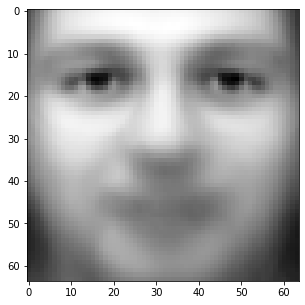

In [2]:
mean_F = np.mean(data, axis=0)

plt.figure(figsize=(5, 5))
plt.imshow(mean_F.reshape(64, 64), cmap=plt.cm.gray)


### B. True

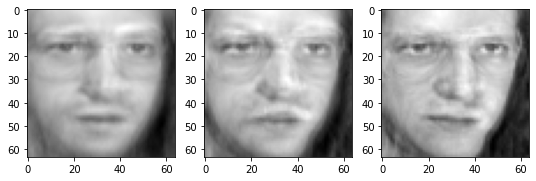

In [3]:
fig, ax = plt.subplots(1,3, figsize=(9, 3))
index = 0

def pca(data, n_components):
    centered = data - np.mean(data, axis=0)
    U, s, VT = np.linalg.svd(centered, full_matrices=True)
    components = VT[:n_components]
    V = VT.T[:, :n_components]
    projected = np.dot(centered, V)
    return projected, components, np.mean(data, axis=0), centered

for i in [25,50,100]:
    
    projected_data, components, data_mean, centered = pca(data, i)
    reconstructed = np.dot(projected_data, components) + data_mean
    ax[index].imshow(reconstructed[9, :].reshape(64, 64), cmap=plt.cm.gray)
    index +=1
    


### C. False

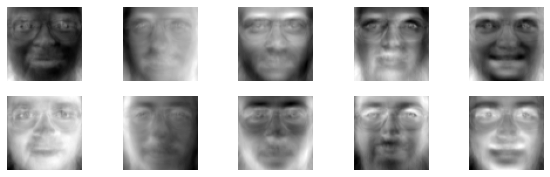

In [4]:
n_components = 5
projected, components, mean, C = pca(data, n_components)

positive_faces = components.reshape((n_components, 64, 64))
negative_faces = -components.reshape((n_components, 64, 64))

fig, ax = plt.subplots(2, n_components, figsize=(10, 3))

for index, face in enumerate(positive_faces):
    ax[0, index].imshow(face, cmap=plt.cm.gray)
    ax[0, index].axis("off")

for index, face in enumerate(negative_faces):
    ax[1, index].imshow(face, cmap=plt.cm.gray)
    ax[1, index].axis("off")

### D. True
To reconstruct an image from its principal components, we must project the data back onto the directions of maximum variance by multiplying the principal components with the transpose of the eigenvectors and add the mean of the original data to undo the centering of the data.